In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,learning_curve



In [2]:
df = pd.read_csv("csv/df_preparation.csv")

# Division du dataset en features et target

In [3]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living_carre', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_above_carre', 'sqft_basement', 'sqft_basement_carre', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'month', 'price'],
      dtype='object')

In [4]:
feature = df.columns[0:-1]
target = 'price'
X =df.drop(["price","month"],axis=1)
y = df[target]

In [5]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living_carre', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_above_carre', 'sqft_basement', 'sqft_basement_carre', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
numerical_features = [
       'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_living_carre', 'sqft_lot','sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15'
       ]
categorical_features = [
       
       'floors','waterfront','view', 'condition', 'grade','zipcode'
       ]

In [7]:
my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    ("pol",PolynomialFeatures(),numerical_features),
    ("one_hot_encoder",OneHotEncoder(handle_unknown = 'ignore'),categorical_features)
])

# Separation en données d'entrainement et de test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, train_size = 0.8)

# Modélisation

## Algorithme de régression linéaire Ridge

In [9]:

# modelRid = make_pipeline( my_col_trans,GridSearchCV(Ridge(),param_grid={'alpha': [0,0.01,0.05,0.1,1,10,100,300]},
#                                  scoring='r2',
#                                  refit=True))

# for exp in range(2):
#     affinage = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
#     liste_param = [param for param in np.linspace(affinage - (affinage/10**(exp+1)),affinage + (affinage/10**(exp+1)),20)]
#     print(liste_param, 'best_alpha',affinage)
#     modelRid = make_pipeline( my_col_trans,GridSearchCV(Ridge(),param_grid={'alpha': liste_param},
#                                  scoring='r2',
#                                  refit=True))

# best_alpha = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
# best_alpha

In [10]:
modelRid= make_pipeline(my_col_trans, Ridge(alpha=10))
modelRid.fit(X_train,y_train)
modelRid.score(X_train,y_train)

0.8483262928671641

In [11]:
modelRid.score(X_test,y_test)

0.8282672966421042

In [12]:
y_pred = modelRid.predict(X_train)

In [13]:
rest = (y_pred - y_train).abs().sort_values()
print(rest)

8944     3.299088e+00
19230    1.346204e+01
20098    1.684976e+01
4465     1.729629e+01
191      2.029608e+01
             ...     
656      1.398793e+06
10446    1.580114e+06
19017    1.660711e+06
12777    1.779414e+06
21050    1.986798e+06
Name: price, Length: 17290, dtype: float64


In [14]:
to_drop = rest[rest > 950000].index

In [15]:
X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)

In [16]:
modelRid= make_pipeline(my_col_trans, Ridge(alpha=10))
modelRid.fit(X_train,y_train)
modelRid.score(X_train,y_train)

0.8609626684873751

In [17]:
modelRid.score(X_test,y_test)

0.8327378117657288

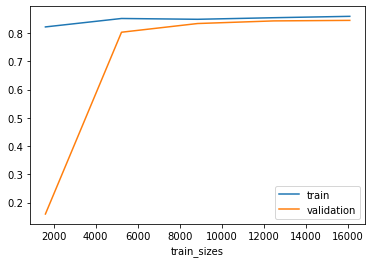

In [18]:

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelRid,X_train,y_train, cv=15,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

# Export en csv

In [19]:
X_train.to_csv('csv/X_train.csv',index=False)
X_test.to_csv('csv/X_test.csv',index=False)
y_train.to_csv('csv/y_train.csv',index=False)
y_test.to_csv('csv/y_test.csv',index=False) 